In [66]:
import numpy as np
import cv2
import PIL
import PIL.Image as Image
import os
import glob
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [67]:
"Import the pre-trained model from TF hub"

image_shape=(224,224)

"Kindly un-hash the below codes and run in your directory/folder"

#classifier = tf.keras.Sequential([
#    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=image_shape+(3,))
#])

'Kindly un-hash the below codes and run in your directory/folder'

In [68]:
image_shape

(224, 224)

In [69]:
image_shape+(3,)

(224, 224, 3)

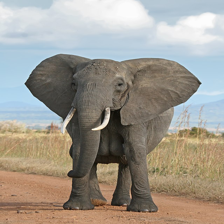

In [70]:
Elephant=Image.open('Elephant.jpg').resize(image_shape)
Elephant

In [71]:
np.array(Elephant)

array([[[184, 204, 213],
        [185, 205, 214],
        [186, 205, 214],
        ...,
        [180, 198, 212],
        [179, 197, 211],
        [179, 197, 211]],

       [[192, 207, 215],
        [195, 211, 219],
        [192, 208, 217],
        ...,
        [179, 197, 211],
        [179, 197, 211],
        [178, 196, 210]],

       [[210, 219, 224],
        [209, 220, 226],
        [204, 216, 223],
        ...,
        [178, 196, 210],
        [178, 196, 210],
        [178, 196, 210]],

       ...,

       [[175, 139, 109],
        [178, 142, 113],
        [179, 144, 114],
        ...,
        [194, 151, 120],
        [190, 146, 116],
        [189, 145, 115]],

       [[188, 155, 126],
        [185, 151, 123],
        [185, 152, 123],
        ...,
        [189, 146, 113],
        [193, 150, 117],
        [196, 153, 120]],

       [[170, 139, 110],
        [174, 143, 115],
        [179, 148, 119],
        ...,
        [180, 137, 103],
        [183, 140, 106],
        [193, 150, 116]]

In [72]:
np.array(Elephant).max()

255

In [73]:
Elephant=np.array(Elephant)/255
Elephant.shape

(224, 224, 3)

In [74]:
np.array(Elephant).max()

1.0

In [75]:
np.array(Elephant)

array([[[0.72156863, 0.8       , 0.83529412],
        [0.7254902 , 0.80392157, 0.83921569],
        [0.72941176, 0.80392157, 0.83921569],
        ...,
        [0.70588235, 0.77647059, 0.83137255],
        [0.70196078, 0.77254902, 0.82745098],
        [0.70196078, 0.77254902, 0.82745098]],

       [[0.75294118, 0.81176471, 0.84313725],
        [0.76470588, 0.82745098, 0.85882353],
        [0.75294118, 0.81568627, 0.85098039],
        ...,
        [0.70196078, 0.77254902, 0.82745098],
        [0.70196078, 0.77254902, 0.82745098],
        [0.69803922, 0.76862745, 0.82352941]],

       [[0.82352941, 0.85882353, 0.87843137],
        [0.81960784, 0.8627451 , 0.88627451],
        [0.8       , 0.84705882, 0.8745098 ],
        ...,
        [0.69803922, 0.76862745, 0.82352941],
        [0.69803922, 0.76862745, 0.82352941],
        [0.69803922, 0.76862745, 0.82352941]],

       ...,

       [[0.68627451, 0.54509804, 0.42745098],
        [0.69803922, 0.55686275, 0.44313725],
        [0.70196078, 0

In [76]:
Elephant[np.newaxis,...].shape

(1, 224, 224, 3)

In [77]:
result=classifier.predict(Elephant[np.newaxis,...])
result

1/1 [==============================] - 0s 38ms/step


array([[ 0.20894313,  1.1506753 , -0.05350032, ..., -0.07477284,
        -1.0920587 ,  0.12114708]], dtype=float32)

In [78]:
predicted_label=np.argmax(result)

In [79]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [80]:
image_labels[predicted_label]

'African elephant'

In [81]:
for files in os.listdir("./Animal_Images"):
    print (files)

Elephant
Leopard
Snow_Leopard
Tiger


In [82]:
list(os.listdir("./Animal_Images"))

['Elephant', 'Leopard', 'Snow_Leopard', 'Tiger']

In [83]:
sample_ds = tf.keras.utils.image_dataset_from_directory(
  'Animal_Images',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224,224),
  batch_size=32)

Found 284 files belonging to 4 classes.
Using 228 files for training.


In [84]:
class_names = sample_ds.class_names
print(class_names)

['Elephant', 'Leopard', 'Snow_Leopard', 'Tiger']


In [85]:
"Display of images from dataset"

'Display of images from dataset'

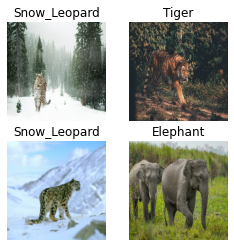

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
for images, labels in sample_ds.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [25]:
for image_batch, labels_batch in sample_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [60]:
"Kindly un-hash the below codes and run in your directory/folder"

#location_dir='xx\\Kaggle Dataset\\Transfer Learning\\Animal_Images'

'Kindly un-hash the below codes and run in your directory/folder'

In [61]:
"Kindly un-hash the below codes and run in your directory/folder"

import pathlib
data_dir = pathlib.Path(location_dir)
#data_dir

In [28]:
data_dir.glob('*/*.jpg')

<generator object Path.glob at 0x0000023002849970>

In [62]:
"Kindly un-hash the below codes and run in your directory/folder"
#list(data_dir.glob('*/*.jpg'))[:2]

'Kindly un-hash the below codes and run in your directory/folder'

In [30]:
image_count = len(list(data_dir.glob('*/*.*')))
print(image_count)

287


In [56]:
Tiger = list(data_dir.glob('Tiger/*'))
#Tiger[:5]

In [88]:
"Due to size constraint , I have removed the image and used #"
Snow_Leopard = list(data_dir.glob('Snow_Leopard/*'))
#PIL.Image.open(str(Snow_Leopard[0]))

In [64]:
"Creation of name & label dictionary"

'Creation of name & label dictionary'

In [34]:
animals_images_dict = {
    'Tiger': list(data_dir.glob('Tiger/*')),
    'Elephant': list(data_dir.glob('Elephant/*')),
    'Leopard': list(data_dir.glob('Leopard/*')),
    'Snow_Leopard': list(data_dir.glob('Snow_Leopard/*')),
}

In [35]:
animals_labels_dict = {
    'Tiger': 0,
    'Elephant': 1,
    'Leopard': 2,
    'Snow_Leopard': 3,
}

In [59]:
"Kindly un-hash the below codes and run in your directory/folder"
#animals_images_dict['Snow_Leopard'][:2]

'Kindly un-hash the below codes and run in your directory/folder'

In [37]:
img = cv2.imread(str(animals_images_dict['Snow_Leopard'][0]))

In [38]:
img.shape

(630, 1200, 3)

In [39]:
cv2.resize(img,(image_shape)).shape

(224, 224, 3)

In [65]:
"Iterate through each image and store the resize images in X"

'Iterate through each image and store the resize images in X'

In [40]:
X, y = [], []

for animal_name, images in animals_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(image_shape))
        X.append(resized_img)
        y.append(animals_labels_dict[animal_name])

In [41]:
X[0]

array([[[ 1,  1,  1],
        [ 2,  3,  1],
        [ 1,  5,  1],
        ...,
        [ 1,  2,  0],
        [ 3,  9,  4],
        [ 5, 16,  6]],

       [[ 1,  1,  1],
        [ 0,  0,  0],
        [ 2,  3,  1],
        ...,
        [ 2,  9,  2],
        [ 4, 13,  3],
        [ 2, 14,  2]],

       [[ 0,  7,  2],
        [ 2,  6,  5],
        [ 2,  8,  5],
        ...,
        [ 3, 11,  4],
        [ 7, 21,  9],
        [ 4, 21,  8]],

       ...,

       [[28, 43, 46],
        [22, 36, 42],
        [25, 37, 41],
        ...,
        [29, 44, 47],
        [27, 39, 43],
        [29, 42, 44]],

       [[26, 38, 42],
        [25, 37, 41],
        [19, 30, 34],
        ...,
        [31, 48, 51],
        [41, 58, 62],
        [36, 54, 55]],

       [[21, 39, 43],
        [23, 35, 39],
        [22, 34, 39],
        ...,
        [31, 50, 50],
        [38, 57, 61],
        [31, 47, 53]]], dtype=uint8)

In [42]:
X = np.array(X)
y = np.array(y)

In [43]:
"Train Test Split"

'Train Test Split'

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [45]:
"Scaling by 255"

'Scaling'

In [46]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [47]:
X_train_scaled[0]

array([[[0.00392157, 0.01176471, 0.01176471],
        [0.        , 0.00784314, 0.00784314],
        [0.        , 0.00392157, 0.00392157],
        ...,
        [0.        , 0.01176471, 0.01568627],
        [0.        , 0.00784314, 0.02352941],
        [0.        , 0.01176471, 0.02352941]],

       [[0.        , 0.00784314, 0.00784314],
        [0.        , 0.00784314, 0.00784314],
        [0.        , 0.00784314, 0.00784314],
        ...,
        [0.        , 0.00784314, 0.01176471],
        [0.00392157, 0.01176471, 0.01568627],
        [0.00392157, 0.01176471, 0.01960784]],

       [[0.        , 0.00392157, 0.00392157],
        [0.        , 0.00784314, 0.00784314],
        [0.        , 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.01176471, 0.01568627],
        [0.        , 0.00784314, 0.01176471],
        [0.        , 0.01176471, 0.01568627]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.01176471, 0.00392157, 0.00392157],
        [0.01176471, 0

In [48]:
"Using Pre-Trained Model from Mobilenet"

'Using Pre-Trained Model from Mobilenet'

In [49]:
"We need only the feature extractor and not the complete model"

feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224,224,3), trainable=False)

In [50]:
num_of_animals = 4

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_animals)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [51]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


In [52]:
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
7/7 [==============================] - 5s 352ms/step - loss: 1.0848 - acc: 0.5767
Epoch 2/5
7/7 [==============================] - 2s 355ms/step - loss: 0.4853 - acc: 0.8977
Epoch 3/5
7/7 [==============================] - 3s 392ms/step - loss: 0.2528 - acc: 0.9721
Epoch 4/5
7/7 [==============================] - 3s 382ms/step - loss: 0.1544 - acc: 0.9860
Epoch 5/5
7/7 [==============================] - 3s 388ms/step - loss: 0.1080 - acc: 0.9907


In [63]:
"It is seen that with only 5 epochs we achieved 99% of accuracy"

'It is seen that with only 5 epochs we achieved 99% of accuracy'

In [53]:
model.evaluate(X_test_scaled,y_test)

3/3 [==============================] - 2s 300ms/step - loss: 0.1335 - acc: 0.9861


[0.13353891670703888, 0.9861111044883728]